In [9]:
"""
We want to find which factor predicts cancellation of hotel booking most accurately:
1. Lead Time – How far in advance the booking was made. (Most predictive)
2. Average Price per Room – The cost of the booking.
3. Arrival Date – The specific day of arrival (within the month).
"""

'\nWe want to find which factor predicts cancellation of hotel booking most accurately:\n1. Lead Time – How far in advance the booking was made. (Most predictive)\n2. Average Price per Room – The cost of the booking.\n3. Arrival Date – The specific day of arrival (within the month).\n'

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('train__dataset.csv')

# View first few rows
print(df.head())


   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  4   
1             2               1                     0                  2   
2             1               0                     1                  5   
3             1               0                     2                  4   
4             2               0                     0                  4   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  1                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        118          2017    

In [5]:
# Display number of rows and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [6]:
# Drop rows with missing values
dataCleaned = df.dropna()
dataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [17]:
<h2>Exploratory Data Analysis</h2>

This section covers Exploratory Analysis, Statistical Description, Analytic Visualisation and Pattern Recognition.

SyntaxError: invalid syntax (2446863633.py, line 1)

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt

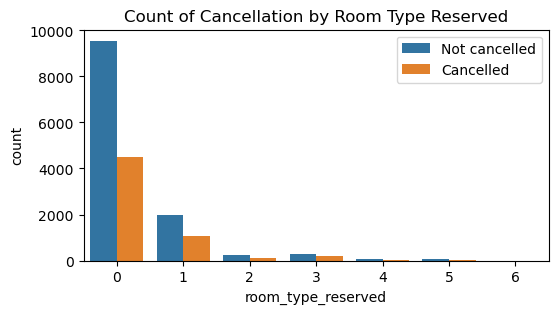

In [21]:
plt.figure(figsize=(6, 3)) 
sb.countplot(x='room_type_reserved', hue='booking_status', data=dataCleaned)
plt.title('Count of Cancellation by Room Type Reserved')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

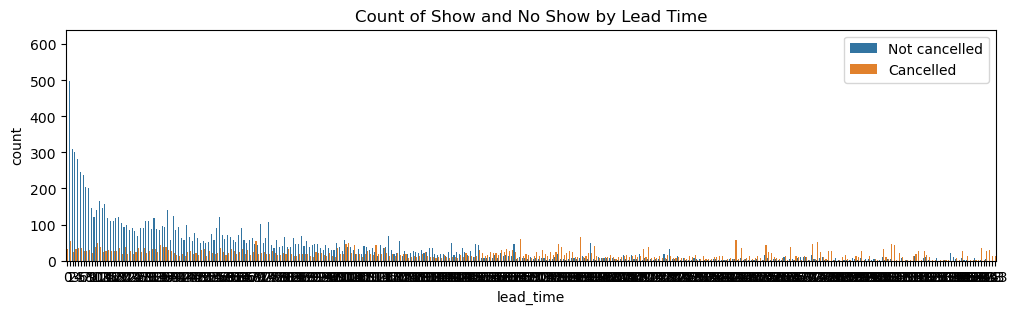

In [23]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='lead_time', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Lead Time')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

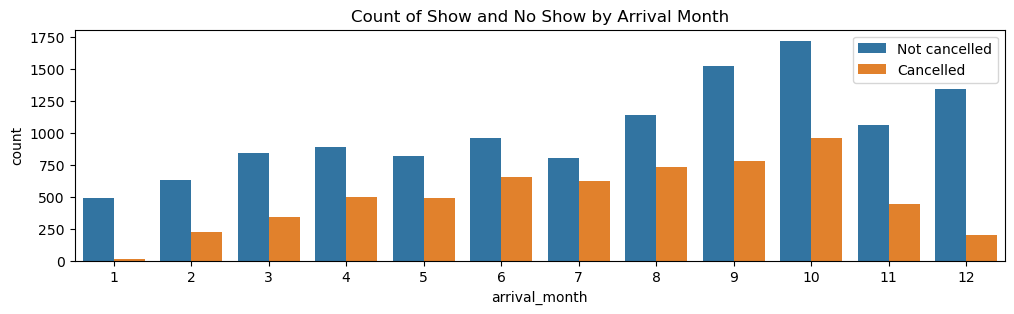

In [24]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='arrival_month', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Arrival Month')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

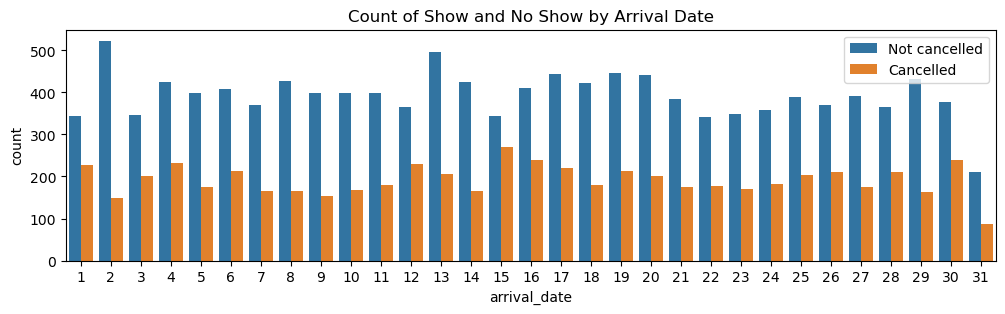

In [25]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='arrival_date', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Arrival Date')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

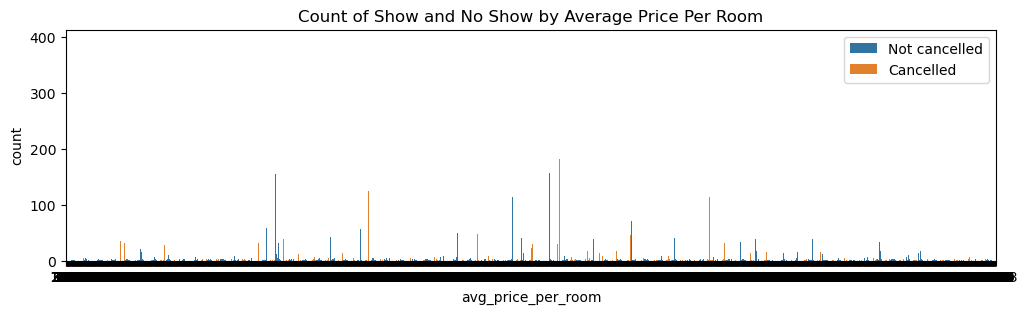

In [26]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='avg_price_per_room', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Average Price Per Room')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

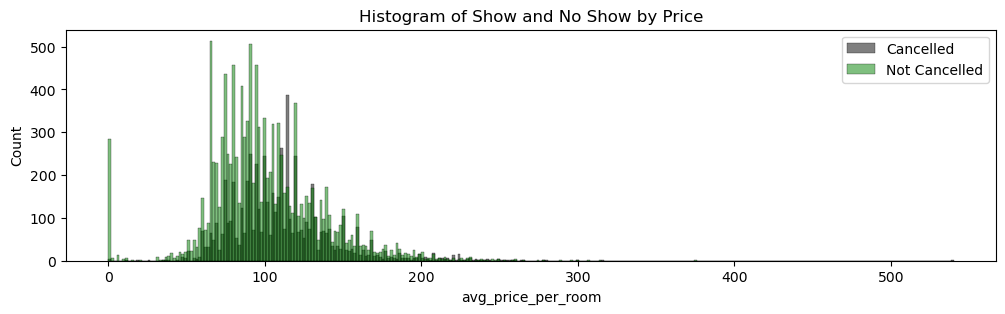

In [30]:
plt.figure(figsize=(12, 3))
sb.histplot(data=dataCleaned, x='avg_price_per_room', hue='booking_status', bins=300, palette={1.0: 'black', 0.0: 'green'})
plt.title('Histogram of Show and No Show by Price')
plt.legend(labels=['Cancelled', 'Not Cancelled'])
plt.show()

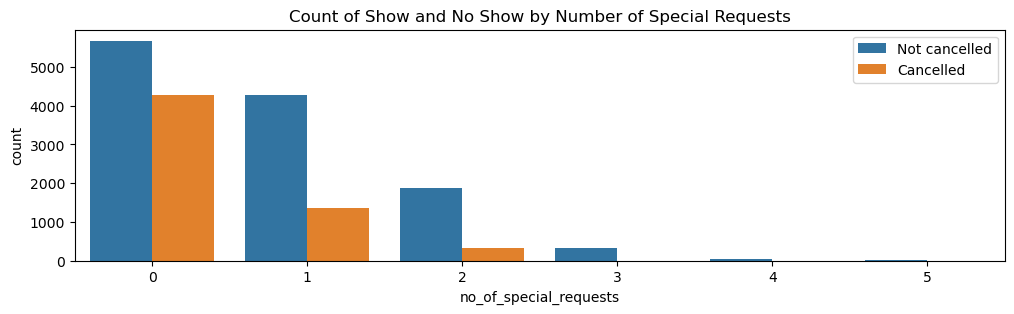

In [27]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='no_of_special_requests', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Number of Special Requests')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

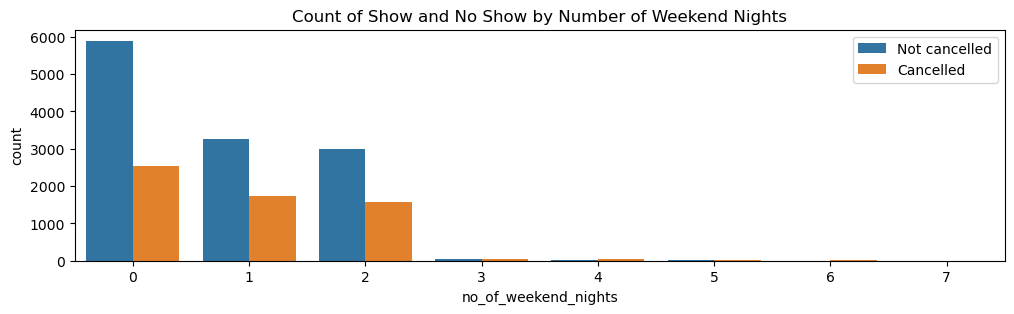

In [28]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='no_of_weekend_nights', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Number of Weekend Nights')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

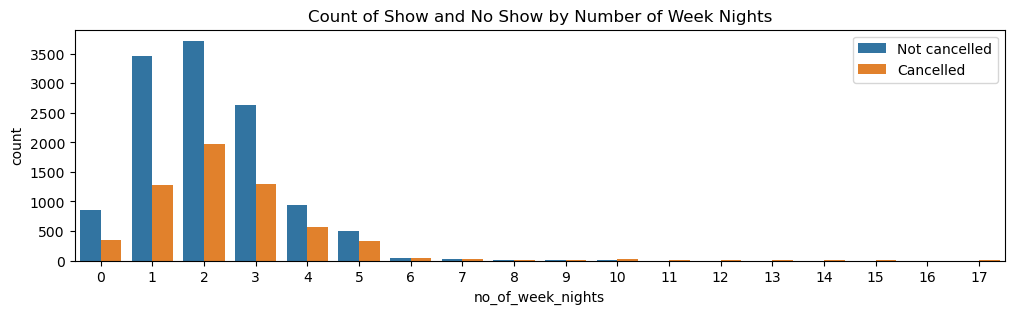

In [29]:
plt.figure(figsize=(12, 3)) 
sb.countplot(x='no_of_week_nights', hue='booking_status', data=dataCleaned)
plt.title('Count of Show and No Show by Number of Week Nights')
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

In [32]:
"""
From the exploratory analysis, we notice that the top 3 factors that predict cancellation of hotel booking are: 
    1. Lead Time – How far in advance the booking was made. (Most predictive)
    2. Average Price per Room – The cost of the booking.
    3. Arrival Date – The specific day of arrival (within the month).
"""

'\nFrom the exploratory analysis, we notice that the top 3 factors that predict cancellation of hotel booking are: \n    1. Lead Time – How far in advance the booking was made. (Most predictive)\n    2. Average Price per Room – The cost of the booking.\n    3. Arrival Date – The specific day of arrival (within the month).\n'

In [34]:
<h4>Let's perform Chi-Square Test and Cramer's V Test to confirm our hypothesis.</h4>

Our target variable 'booking_status' is a categorical variable. Majority of the variables in our dataset are categorical. We can use Chi-Square Test to determine if there is a significant association between 'booking_status' and the other categorical variables in the dataset. A higher Chi-Square values indicates a stronger association between the variable and 'booking_status', suggesting that they are not independent of each other. 

SyntaxError: invalid syntax (1306504981.py, line 1)

In [35]:
import numpy as np
from scipy.stats import chi2_contingency

variables = ['no_of_weekend_nights', 'no_of_week_nights', 'room_type_reserved', 'lead_time','arrival_month','arrival_date','avg_price_per_room','no_of_special_requests']

results_list = []

# Perform Chi-Square Test for each variable
for var in variables:
    contingency_table = pd.crosstab(dataCleaned[var], dataCleaned['booking_status'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Append results to list
    results_list.append({'Variable': var, 'Chi2': chi2})

# Create DataFrame from results list
chi_square_results = pd.DataFrame(results_list)

# Display Chi-Square results
print("Chi-Square Test Results:\n", chi_square_results)

Chi-Square Test Results:
                  Variable         Chi2
0    no_of_weekend_nights   122.979373
1       no_of_week_nights   233.535650
2      room_type_reserved    44.862266
3               lead_time  4796.461420
4           arrival_month   705.771284
5            arrival_date   164.327802
6      avg_price_per_room  5400.422854
7  no_of_special_requests  1159.268059


In [36]:
def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

variables = ['no_of_weekend_nights', 'no_of_week_nights', 'room_type_reserved', 'lead_time','arrival_month','arrival_date','avg_price_per_room','no_of_special_requests']

results_list = []

# Perform Cramér's V test for each variable
for var in variables:
    contingency_table = pd.crosstab(dataCleaned[var], dataCleaned['booking_status'])
    cramers_v_statistic = cramers_v(contingency_table.values)
    
    # Append results to list
    results_list.append({'Variable': var, 'Cramers_V': cramers_v_statistic})

# Create DataFrame from results list
cramers_v_results = pd.DataFrame(results_list)

# Display Cramér's V results
print("Cramér's V Test Results:\n", cramers_v_results)

Cramér's V Test Results:
                  Variable  Cramers_V
0    no_of_weekend_nights   0.079968
1       no_of_week_nights   0.109268
2      room_type_reserved   0.046290
3               lead_time   0.495705
4           arrival_month   0.195727
5            arrival_date   0.086062
6      avg_price_per_room   0.384360
7  no_of_special_requests   0.252280


In [40]:
# Model 1: Multi-variate decision tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

predictors = ['lead_time', 'avg_price_per_room', 'no_of_special_requests']

# Split the data into 80% training and 20% testing sets
X = dataCleaned[predictors]
y = dataCleaned['booking_status']  

# Encode categorical predictor variables
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the multivariate decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Plot confusion matrix
plt.figure(figsize=(6, 3))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted 'booking_status'")
plt.ylabel("True 'booking_status'")
plt.show()

# Print classification report
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))

# Get predicted probabilities for ROC curve
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve and Precision-Recall curve side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0].plot(fpr, tpr, lw=2, label='ROC Curve (AUC = %0.3f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc="lower right")

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[1].plot(recall, precision, lw=2, label='Precision-Recall Curve (AUC = %0.3f)' % pr_auc)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()
plt.tight_layout()
plt.show()

NameError: name 'train_test_split' is not defined

In [41]:
# Model 2: Linear regression

In [42]:
# Model 3: Random forest

In [43]:
# Model 4: SVM 

In [45]:
# Model 5: Gradient Boosting